## Import Packages

In [1]:
import pandas as pd 
import numpy as np
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import mplfinance as mpf
from sklearn import metrics

## Data Preparation

In [2]:
df = yf.download(tickers = "EURUSD=X",period = "3mo",interval = "1h",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)

[*********************100%***********************]  1 of 1 completed


In [3]:
df = pd.DataFrame(df)
df =df.drop(['Volume'],1)
df =df.drop(['Open'],1)
print(df)


                               High       Low     Close
2022-04-07 17:00:00+01:00  1.090156  1.088021  1.088258
2022-04-07 18:00:00+01:00  1.089443  1.088021  1.088732
2022-04-07 19:00:00+01:00  1.089562  1.087666  1.088139
2022-04-07 20:00:00+01:00  1.088495  1.087193  1.087666
2022-04-07 21:00:00+01:00  1.088732  1.087311  1.088376
...                             ...       ...       ...
2022-07-07 14:00:00+01:00  1.019576  1.016880  1.018952
2022-07-07 15:00:00+01:00  1.018952  1.017294  1.017501
2022-07-07 16:00:00+01:00  1.017812  1.015538  1.015847
2022-07-07 17:00:00+01:00  1.016984  1.015435  1.016054
2022-07-07 17:47:24+01:00  1.016157  1.016157  1.016157

[1549 rows x 3 columns]


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_10564\3078821658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_10564\3078821658.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Open'],1)


In [4]:
#df['Open1'] = df['Open'].shift(-1)
df['High1'] = df['High'].shift(-1)
df['Low1'] = df['Low'].shift(-1)
df['Close1'] = df['Close'].shift(-1)

#df['Open2'] = df['Open'].shift(-2)
df['High2'] = df['High'].shift(-2)
df['Low2'] = df['Low'].shift(-2)
df['Close2'] = df['Close'].shift(-2)

"""
df['Open3'] = df['Open'].shift(-3)
df['High3'] = df['High'].shift(-3)
df['Low3'] = df['Low'].shift(-3)
df['Close3'] = df['Close'].shift(-3)

df['Open4'] = df['Open'].shift(-4)
df['High4'] = df['High'].shift(-4)
df['Low4'] = df['Low'].shift(-4)
df['Close4'] = df['Close'].shift(-4)
"""

df = df[:-2]
print(df)

                               High       Low     Close     High1      Low1  \
2022-04-07 17:00:00+01:00  1.090156  1.088021  1.088258  1.089443  1.088021   
2022-04-07 18:00:00+01:00  1.089443  1.088021  1.088732  1.089562  1.087666   
2022-04-07 19:00:00+01:00  1.089562  1.087666  1.088139  1.088495  1.087193   
2022-04-07 20:00:00+01:00  1.088495  1.087193  1.087666  1.088732  1.087311   
2022-04-07 21:00:00+01:00  1.088732  1.087311  1.088376  1.088850  1.088139   
...                             ...       ...       ...       ...       ...   
2022-07-07 12:00:00+01:00  1.020200  1.018952  1.019368  1.019888  1.017398   
2022-07-07 13:00:00+01:00  1.019888  1.017398  1.017501  1.019576  1.016880   
2022-07-07 14:00:00+01:00  1.019576  1.016880  1.018952  1.018952  1.017294   
2022-07-07 15:00:00+01:00  1.018952  1.017294  1.017501  1.017812  1.015538   
2022-07-07 16:00:00+01:00  1.017812  1.015538  1.015847  1.016984  1.015435   

                             Close1     High2      

In [5]:
forecast_out = int(24)
df['PredictionClose'] = df['Close2'].shift(-forecast_out)
print(df)

                               High       Low     Close     High1      Low1  \
2022-04-07 17:00:00+01:00  1.090156  1.088021  1.088258  1.089443  1.088021   
2022-04-07 18:00:00+01:00  1.089443  1.088021  1.088732  1.089562  1.087666   
2022-04-07 19:00:00+01:00  1.089562  1.087666  1.088139  1.088495  1.087193   
2022-04-07 20:00:00+01:00  1.088495  1.087193  1.087666  1.088732  1.087311   
2022-04-07 21:00:00+01:00  1.088732  1.087311  1.088376  1.088850  1.088139   
...                             ...       ...       ...       ...       ...   
2022-07-07 12:00:00+01:00  1.020200  1.018952  1.019368  1.019888  1.017398   
2022-07-07 13:00:00+01:00  1.019888  1.017398  1.017501  1.019576  1.016880   
2022-07-07 14:00:00+01:00  1.019576  1.016880  1.018952  1.018952  1.017294   
2022-07-07 15:00:00+01:00  1.018952  1.017294  1.017501  1.017812  1.015538   
2022-07-07 16:00:00+01:00  1.017812  1.015538  1.015847  1.016984  1.015435   

                             Close1     High2      

In [6]:
X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)
X_forecast = X[-(forecast_out):]
X = X[:-(forecast_out)]
Y = np.array(df['PredictionClose'])
Y = Y[:-(forecast_out)]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_10564\3375762268.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


## Neural Network

In [7]:
# Training
Neurons = 24
model = Sequential()
model.add(Dense(Neurons,activation='relu')) # Input Layer 
model.add(Dense(Neurons,activation='relu'))       
model.add(Dense(Neurons,activation='relu')) 
model.add(Dense(1)) # Output Layer
model.compile(optimizer='Adam', loss='mse')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose= 1, patience= 5)
model.fit(x = X_train, y = Y_train,
          validation_data=(X_test, Y_test),
          batch_size= 256,
          epochs= 1000,
          callbacks=[early_stop]
          )

Epoch 1/1000
5/5 [==============================] - 1s 44ms/step - loss: 0.8779 - val_loss: 0.6052
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 0.5135 - val_loss: 0.3633
Epoch 3/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.3358 - val_loss: 0.2776
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2741 - val_loss: 0.2435
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2539 - val_loss: 0.2262
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.2432 - val_loss: 0.2110
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.2291 - val_loss: 0.1951
Epoch 8/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.2108 - val_loss: 0.1783
Epoch 9/1000
5/5 [==============================] - 0s 7ms/step - loss: 0.1914 - val_loss: 0.1671
Epoch 10/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.1760 - val_loss: 0.1545
Epoch 11/1000
5/5

Epoch 81/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.3405e-04 - val_loss: 5.0401e-04
Epoch 82/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.2239e-04 - val_loss: 5.3740e-04
Epoch 83/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.0586e-04 - val_loss: 4.7626e-04
Epoch 84/1000
5/5 [==============================] - 0s 8ms/step - loss: 4.0236e-04 - val_loss: 4.9364e-04
Epoch 85/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.9087e-04 - val_loss: 4.6304e-04
Epoch 86/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.5195e-04 - val_loss: 4.1204e-04
Epoch 87/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.3443e-04 - val_loss: 3.9146e-04
Epoch 88/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.2864e-04 - val_loss: 3.8089e-04
Epoch 89/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.1667e-04 - val_loss: 3.7623e-04
Epoch 90/1000
5/5 [==================

5/5 [==============================] - 0s 8ms/step - loss: 1.2336e-04 - val_loss: 1.3860e-04
Epoch 158/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.2189e-04 - val_loss: 1.3299e-04
Epoch 159/1000
5/5 [==============================] - 0s 8ms/step - loss: 1.1882e-04 - val_loss: 1.3136e-04
Epoch 160/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.1787e-04 - val_loss: 1.2592e-04
Epoch 161/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.1599e-04 - val_loss: 1.4298e-04
Epoch 162/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.2125e-04 - val_loss: 1.3636e-04
Epoch 163/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.1888e-04 - val_loss: 1.3981e-04
Epoch 164/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.1808e-04 - val_loss: 1.1890e-04
Epoch 165/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.1536e-04 - val_loss: 1.2504e-04
Epoch 166/1000
5/5 [=======================

<AxesSubplot:>

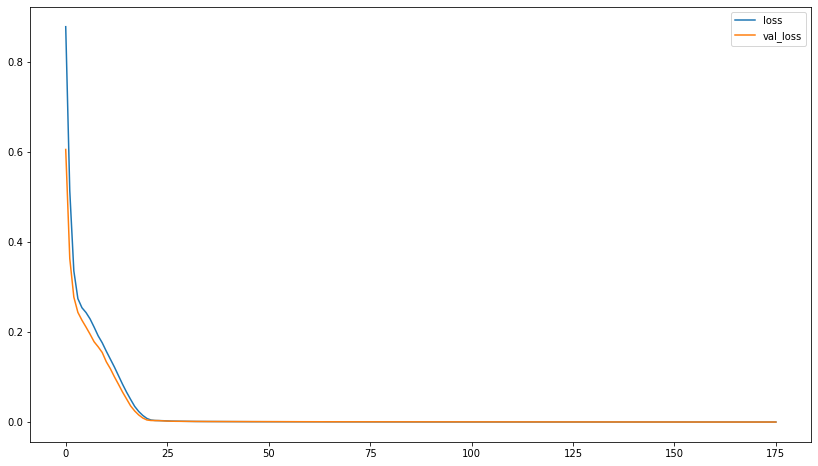

In [8]:
loss = pd.DataFrame(model.history.history)
loss.plot(figsize=(14,8))

In [9]:
#Testing
testpredictions = model.predict(X_test)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

10/10 [==============================] - 0s 1ms/step
R2 Score is:  0.5866153310073943
Mean Squared Error is:  0.0001105374228397996
Root Mean Squared Error is:  0.010513677893097144
Mean Absolute Error is:  0.007632479511323523
Mean Absolute Percentage Error is:  0.007215535579454357


In [10]:
print(X_forecast)

[[-2.76493866 -2.70169341 -2.72542999 -2.68562419 -2.66220045 -2.63346269
  -2.63228184 -2.64899767 -2.65903553]
 [-2.69274906 -2.66921282 -2.64059456 -2.63967723 -2.65570677 -2.66606172
  -2.68470602 -2.62306012 -2.62648641]
 [-2.64673138 -2.66270922 -2.67324551 -2.69218912 -2.62973204 -2.63346269
  -2.68470602 -2.59710018 -2.63951055]
 [-2.69932409 -2.63669481 -2.64059456 -2.69218912 -2.60373489 -2.6465068
  -2.67160561 -2.61008388 -2.63951055]
 [-2.69932409 -2.61065795 -2.65365944 -2.6790668  -2.6167372  -2.6465068
  -2.67160561 -2.62306012 -2.6199706 ]
 [-2.68618157 -2.62368012 -2.65365944 -2.6790668  -2.62973204 -2.62693689
  -2.67160561 -2.59710018 -2.63299474]
 [-2.68618157 -2.63669481 -2.63405837 -2.6790668  -2.60373489 -2.639981
  -2.66505917 -2.62306012 -2.6134548 ]
 [-2.68618157 -2.61065795 -2.64712325 -2.6725094  -2.62973204 -2.62041109
  -2.67160561 -2.59710018 -2.63299474]
 [-2.67961408 -2.63669481 -2.62752218 -2.6790668  -2.60373489 -2.639981
  -2.56006048 -2.57112532 -2

In [11]:
forecast_prediction = model.predict(X_forecast)
print(forecast_prediction)

1/1 [==============================] - 0s 15ms/step
[[1.0240405]
 [1.0291048]
 [1.0145872]
 [1.019113 ]
 [1.0141857]
 [1.0132947]
 [1.0213681]
 [1.0109626]
 [1.052429 ]
 [1.0120646]
 [1.0242075]
 [1.0378841]
 [0.9947318]
 [1.0183065]
 [1.0369025]
 [1.0370826]
 [1.0234079]
 [1.0467662]
 [1.0138795]
 [1.0425416]
 [1.0185875]
 [1.0244775]
 [1.0258596]
 [1.0271548]]


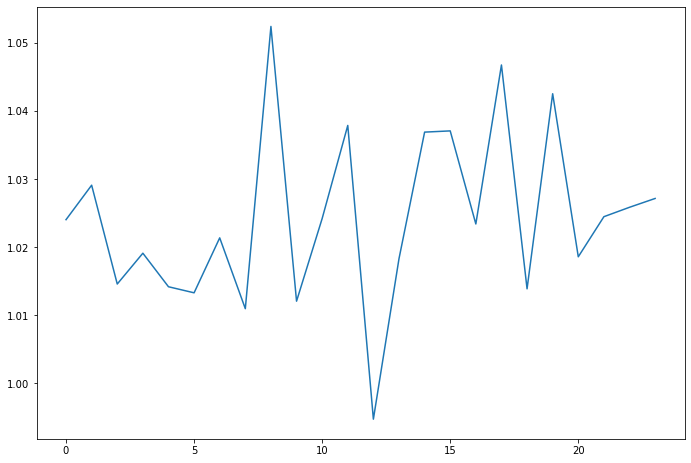

In [12]:
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)

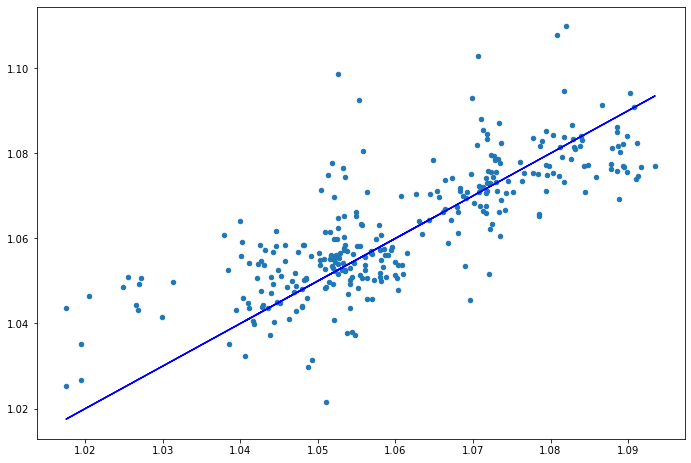

In [13]:
plt.axes([1, 1.5, 1.5 , 1.5])
plt.scatter(Y_test, testpredictions,s=20)
plt.plot(Y_test, Y_test, 'b')

C:\Users\Kazem Kamrani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes:ylabel='Density'>

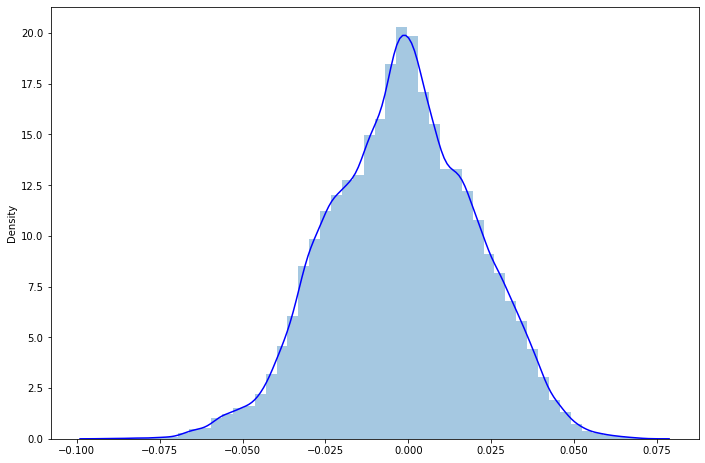

In [14]:
plt.axes([1, 2, 1.5 , 1.5])
sns.distplot(Y_test-testpredictions, kde=True, kde_kws={'color':'b'}, bins=50)